In [1]:
#PHY 80 W23
#Lab 14: Measurement of Planck's Constant (07/02/23)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import optimize
from scipy.stats import binom, poisson, norm

See the handwritten logbook for entries.

### 14.1

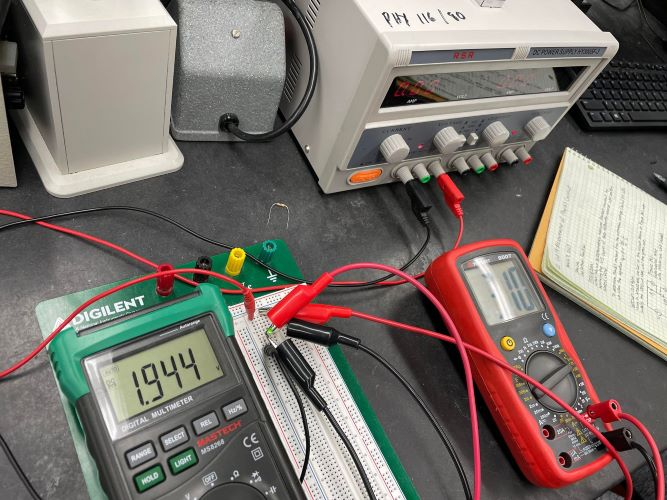

In [2]:
image = Image(filename='../img/phy80_lab14_1.jpg',height = 100)
display(image)
#experimental setup, using 0.995 ± 0.012 kilo-ohm resistor and 565 nm green diode

### 14.2

In [3]:
I_g = np.array([0.503, 1.065, 2.040, 4.030, 6.030, 8.060, 10.151, 12.050])
V_g = np.array([1.852, 1.885, 1.919, 1.963, 1.995, 2.023, 2.050, 2.072])
V_g_unc = np.full(np.shape(V), 0.02)
I_g_unc = I_g * np.sqrt((V_g_unc/V_g)**2 + (0.012/0.995)**2)

plt.errorbar(I_g, V_g, fmt="ro", xerr=I_g_unc, yerr=V_g_unc, label="data")
plt.ylabel("voltage across diode [V]")
plt.xlabel("current through diode [mA]")
plt.title("Voltage vs. Current (green diode)")

def line_func(x, a, b):
    return x * a + b
guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, I_g[3:], V_g[3:], sigma=V_g_unc[3:], absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))

V_A_g = par[1]
V_A_g_unc = unc[1]
print("activation voltage:", f"{round(par[1], 3)}", "±", f"{round(unc[1], 3)}", "V")
print("internal resistance:", f"{round(par[0], 3)}", "±", f"{round(unc[0], 3)}", "kΩ")

xf = np.linspace(0,12, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.legend()
plt.show()

NameError: name 'V' is not defined

### 14.3

activation voltage: 1.823 ± 0.026 V
internal resistance: 0.016 ± 0.003 kΩ


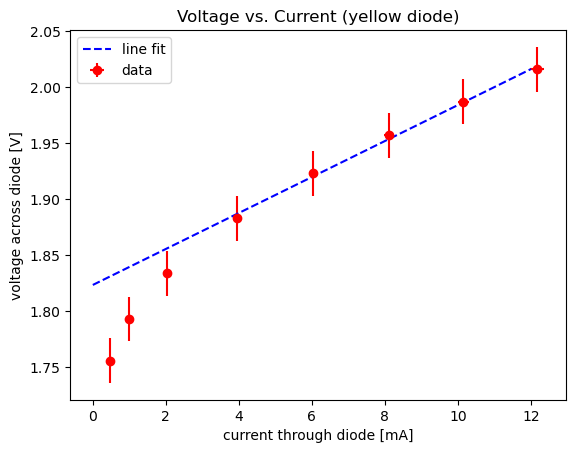

In [ ]:
I_y = np.array([0.472, 0.985, 2.030, 3.950, 6.020, 8.101, 10.151, 12.161])
V_y = np.array([1.756, 1.793, 1.834, 1.883, 1.923, 1.957, 1.987, 2.016])
V_y_unc = np.full(np.shape(V), 0.02)
I_y_unc = I_y * np.sqrt((V_y_unc/V_y)**2 + (0.012/0.995)**2)

plt.errorbar(I_y, V_y, fmt="ro", xerr=I_y_unc, yerr=V_y_unc, label="data")
plt.ylabel("voltage across diode [V]")
plt.xlabel("current through diode [mA]")
plt.title("Voltage vs. Current (yellow diode)")

guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, I_y[3:], V_y[3:], sigma=V_y_unc[3:], absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))

V_A_y = par[1]
V_A_y_unc = unc[1]
print("activation voltage:", f"{round(par[1], 3)}", "±", f"{round(unc[1], 3)}", "V")
print("internal resistance:", f"{round(par[0], 3)}", "±", f"{round(unc[0], 3)}", "kΩ")

xf = np.linspace(0,12, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.legend()
plt.show()

### 14.4

activation voltage: 1.718 ± 0.027 V
internal resistance: 0.018 ± 0.003 kΩ


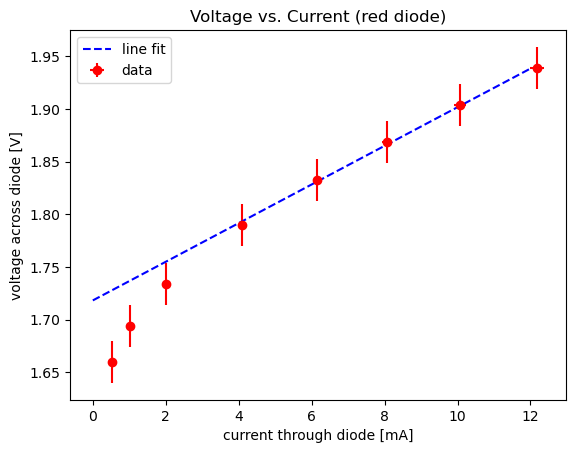

In [ ]:
I_r = np.array([0.523, 1.025, 2.010, 4.080, 6.141, 8.060, 10.070, 12.171])
V_r = np.array([1.660, 1.694, 1.734, 1.790, 1.833, 1.869, 1.904, 1.939])
V_r_unc = np.full(np.shape(V_r), 0.02)
I_r_unc = I_r * np.sqrt((V_r_unc/V_r)**2 + (0.012/0.995)**2)

plt.errorbar(I_r, V_r, fmt="ro", xerr=I_r_unc, yerr=V_r_unc, label="data")
plt.ylabel("voltage across diode [V]")
plt.xlabel("current through diode [mA]")
plt.title("Voltage vs. Current (red diode)")

guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, I_r[3:], V_r[3:], sigma=V_r_unc[3:], absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))

V_A_r = par[1]
V_A_r_unc = unc[1]
print("activation voltage:", f"{round(par[1], 3)}", "±", f"{round(unc[1], 3)}", "V")
print("internal resistance:", f"{round(par[0], 3)}", "±", f"{round(unc[0], 3)}", "kΩ")

xf = np.linspace(0,12, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.legend()
plt.show()

### 14.5

hc =  1.26 ± 0.248 eV-μm


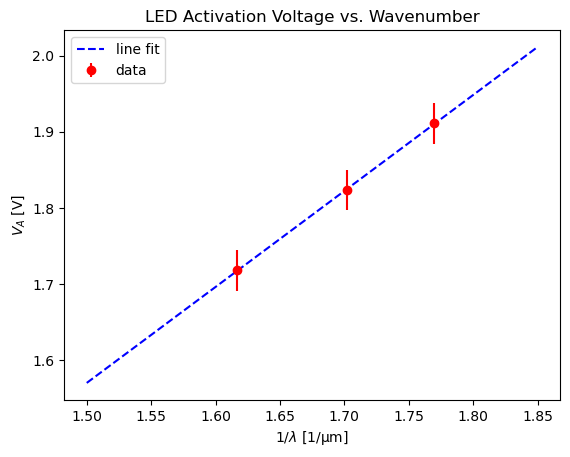

In [ ]:
V_A = np.array([V_A_g, V_A_y, V_A_r])
V_A_unc = np.array([V_A_g_unc, V_A_y_unc, V_A_r_unc])
lamda = np.array([565, 587.5, 618.5])
wavenum = 1000/lamda

plt.errorbar(wavenum, V_A, fmt="ro", yerr=V_A_unc, label="data")
plt.xlabel("$1/\lambda$ [1/μm]")
plt.ylabel("$V_A$ [V]")
plt.title("LED Activation Voltage vs. Wavenumber")

guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, wavenum, V_A, sigma=V_A_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))

hc = par[0]
hc_unc_stat = unc[0]
print("hc =", f"{round(hc, 3)}", "±", f"{round(hc_unc_stat, 3)}", "eV-μm")

xf = np.linspace(1.5,1.85, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.legend()
plt.show()

### 14.6

hc = 1.26 ± 0.248 ± 0.009 eV-μm


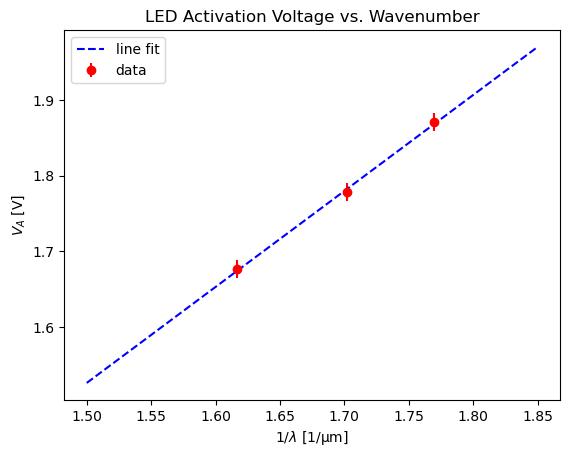

In [ ]:
guess_a = 0.0
guess_b = 0.0

par, cov = optimize.curve_fit(line_func, I_g, V_g, sigma=V_g_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))
V_A_g = par[1]
V_A_g_unc = unc[1]

par, cov = optimize.curve_fit(line_func, I_y, V_y, sigma=V_y_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))
V_A_y = par[1]
V_A_y_unc = unc[1]

par, cov = optimize.curve_fit(line_func, I_r, V_r, sigma=V_r_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))
V_A_r = par[1]
V_A_r_unc = unc[1]

V_A = np.array([V_A_g, V_A_y, V_A_r])
V_A_unc = np.array([V_A_g_unc, V_A_y_unc, V_A_r_unc])
lamda = np.array([565, 587.5, 618.5])
wavenum = 1000/lamda
par, cov = optimize.curve_fit(line_func, wavenum, V_A, sigma=V_A_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))

hc_unc_sys = np.abs(hc - par[0])
print("hc =", f"{round(hc, 3)}", "±", f"{round(hc_unc_stat, 3)}", "±", f"{round(hc_unc_sys, 3)}", "eV-μm")

plt.errorbar(wavenum, V_A, fmt="ro", yerr=V_A_unc, label="data")
plt.xlabel("$1/\lambda$ [1/μm]")
plt.ylabel("$V_A$ [V]")
plt.title("LED Activation Voltage vs. Wavenumber")
xf = np.linspace(1.5,1.85, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.legend()
plt.show()

### 14.7

In [ ]:
hc_unc_tot = np.sqrt(hc_unc_stat**2 + hc_unc_sys**2)
print("hc =", f"{round(hc, 3)}", "±", f"{round(hc_unc_tot, 3)}", "eV-μm")

hc =  1.26 ± 0.248 eV-μm


### 14.8

In [ ]:
print("our measured value lies within {0} sigmas of the known value".format(round((hc - 1.240)/(hc_unc_tot), 3)))
#our measured value is very close to the known value,
#and there is no statistical significance to differences between the two

our measured value lies within 0.079 sigmas of the known value
